# Chua's Circuit Simulation

#### Input initial conditions and get output the graph for circuit

In [1]:
#Imports
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import solve_ivp
import sys

##### My goal here is to create an input option that will define C1, C2, R

In [2]:
#Defining Variables
R1 = 2500
R2 = 986
R3 = 984
R4 = 98000
R5 = 2000
R6 = 217
R7 = 217
R8 = 2180
R9 = 22000
R10 = 21900
R11 = 3520
C1 = 100E-9
C2 = 100E-9
C3 = 10E-9

In [4]:
# dx/dt = α(y - φ(x)), dy/dt = x - y + z, and dz/dt = -βy.
def chua(t, state, alpha, beta, m0, m1):
    x, y, z = state
    dxdt = alpha * (y - x - f(x, m0, m1))
    dydt = (x - y + R5*z) / (R5*C3)
    dzdt = -beta * y
    return [dxdt, dydt, dzdt]


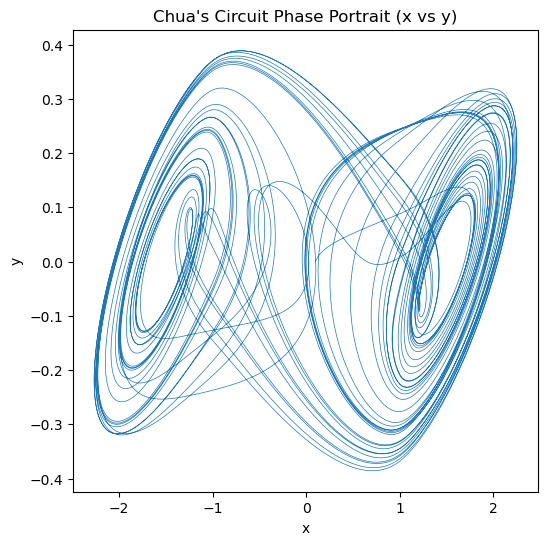

In [7]:
x, y, z = solution.y

plt.figure(figsize=(6,6))
plt.plot(x, y, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Chua's Circuit Phase Portrait (x vs y)")
plt.show()


## Practicing RK4 with Scipy

In [2]:
def practice_ode(t, y):
    return -2*y+2*np.cos(t)-2*np.sin(t)

In [3]:
t_span = (0, 10)
y0 = [1]

In [5]:
sol = solve_ivp(practice_ode, t_span, y0, method='RK45', dense_output=True)

In [7]:
t = sol.t
y = sol.y[0]

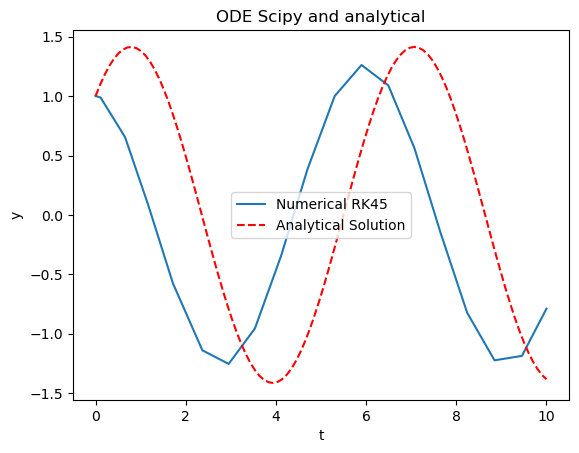

In [14]:
plt.plot(t, y, label='Numerical RK45')

t_analytical = np.linspace(t_span[0], t_span[1], 100)
y_analytical = np.sin(t_analytical) + np.cos(t_analytical)
plt.plot(t_analytical, y_analytical, 'r--', label= 'Analytical Solution')

plt.xlabel('t')
plt.ylabel('y')
plt.title('ODE Scipy and analytical')
plt.legend()
plt.grid(False)
plt.show()

## Testing RK4 on Chua

In [23]:
def chua_test(t, state, alpha, beta, m0, m1):
    x, y, z = state
    dx = alpha*(y - x- f(x, m0, m1))
    dy = x - y + z
    dz = -beta*y
    return [dx, dy, dz]

In [19]:
def f(x, m0, m1):
    return m1*x +.5*(m0-m1)*(np.abs(x+1)-np.abs(x-1))

In [74]:
R1 = 1500
L = 15E-3
C1 = 10E-9
C2 = 100E-9

alpha = C2/C1
beta = R1*R1*C2/L 

t_span = (0, 100)
initial_state = [0.1, 0.0, 0.0]

m0 = -1.143
m1 = -0.714

print(alpha, beta)

sol = solve_ivp(chua_test,
                t_span, 
                initial_state, 
                args=(alpha, beta, m0, m1),
                t_eval=np.linspace(0, 100, 1000))

x, y, z = sol.y

10.0 14.999999999999998


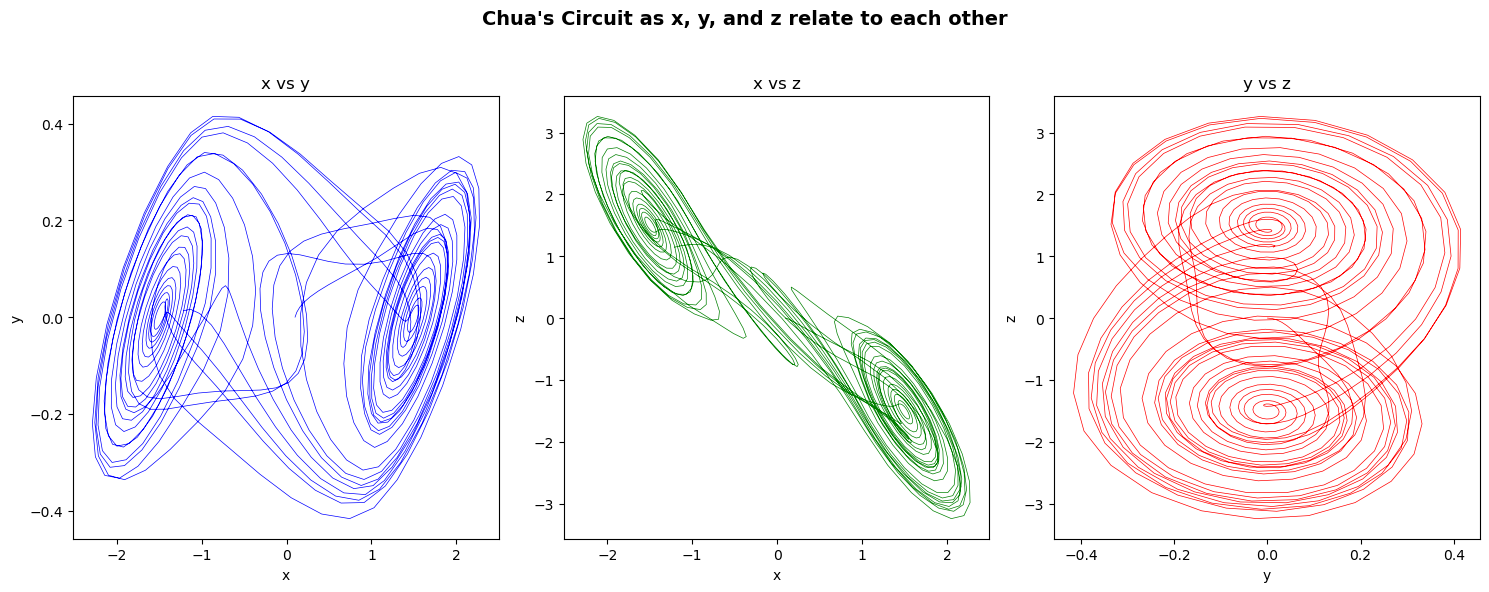

In [75]:
plot_chua(x, y, z)

In [57]:
titles = ["x vs y", "x vs z", "y vs z"]

def plot_chua(x, y, z, title="Chua's Circuit as x, y, and z relate to each other"):
    fig, axs = plt.subplots(1, 3, figsize=(15, 6))  # 3 rows, 1 column

    # x vs y
    axs[0].plot(x, y, color="blue", lw=.5)
    axs[0].set_title("x vs y")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("y")

    # x vs z
    axs[1].plot(x, z, color="green", lw=.5)
    axs[1].set_title("x vs z")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("z")

    # y vs z
    axs[2].plot(y, z, color="red", lw=.5)
    axs[2].set_title("y vs z")
    axs[2].set_xlabel("y")
    axs[2].set_ylabel("z")

    plt.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
    plt.show()


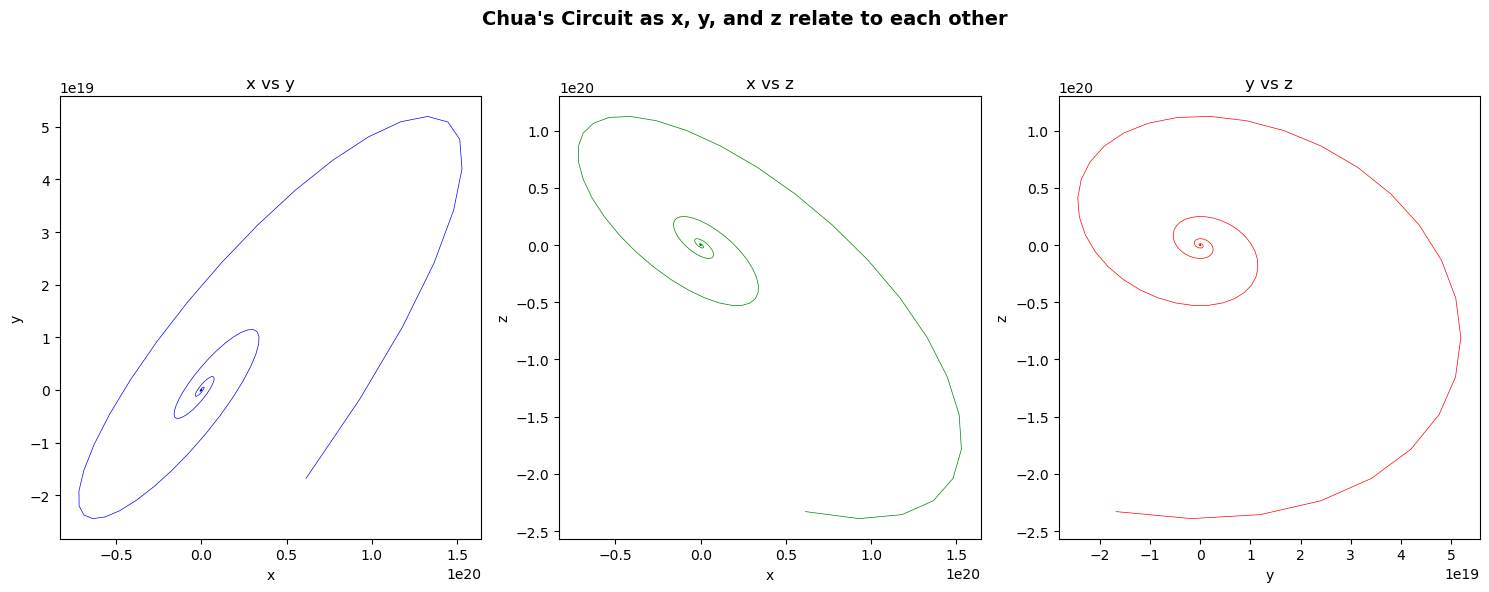

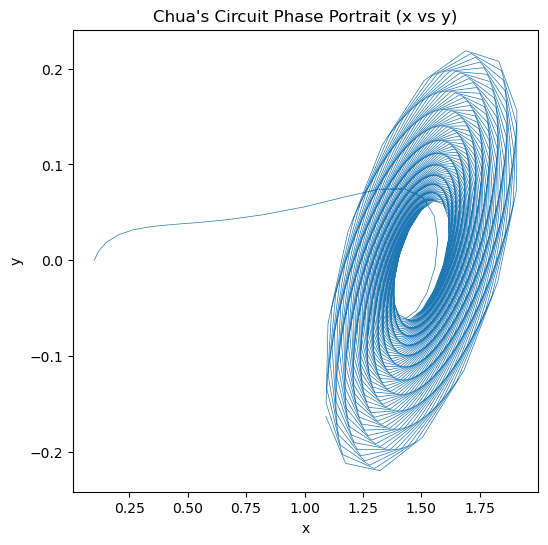

In [69]:
x, y, z = sol.y

plt.figure(figsize=(6,6))
plt.plot(x, y, lw=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Chua's Circuit Phase Portrait (x vs y)")
plt.show()
